<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>Industrial Equipment Monitoring: Anomaly Detection</b></div>

Industrial equipment failures can lead to costly downtime and repairs. Monitoring key parameters like temperature, pressure, vibration, and humidity can help predict and prevent these failures. In this notebook, we'll dive into a dataset that captures these parameters and explore how we can detect anomalies that might indicate equipment faults. If you find this notebook insightful, consider giving it an upvote.

## Table of Contents
1. [Data Loading and Overview](#data-loading)
2. [Exploratory Data Analysis](#eda)
3. [Data Visualization](#visualization)
4. [Anomaly Detection](#anomaly-detection)
5. [Conclusion and Future Work](#conclusion)

## Data Loading and Overview
<a id='data-loading'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = '/kaggle/input/industrial-equipment-monitoring-dataset/equipment_anomaly_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


## Exploratory Data Analysis
<a id='eda'></a>

In [2]:
# Check for missing values
df.isnull().sum()

temperature    0
pressure       0
vibration      0
humidity       0
equipment      0
location       0
faulty         0
dtype: int64

In [3]:
# Summary statistics
df.describe()

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922478,35.738048,1.611809,50.016574,0.099974
std,16.200059,10.381593,0.728560,11.841479,0.299985
min,10.269385,3.620798,-0.428188,10.215077,0.000000
25%,62.777057,29.485682,1.170906,42.612817,0.000000
50%,70.156900,35.227544,1.533113,50.024744,0.000000
75%,77.568387,41.159913,1.924700,57.340513,0.000000
max,149.690420,79.887734,4.990537,89.984718,1.000000


## Data Visualization
<a id='visualization'></a>

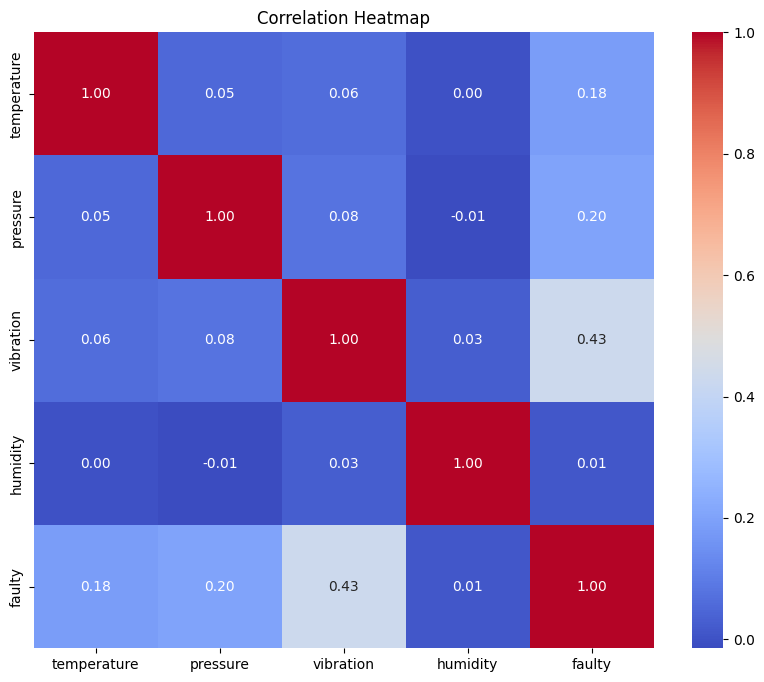

In [4]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

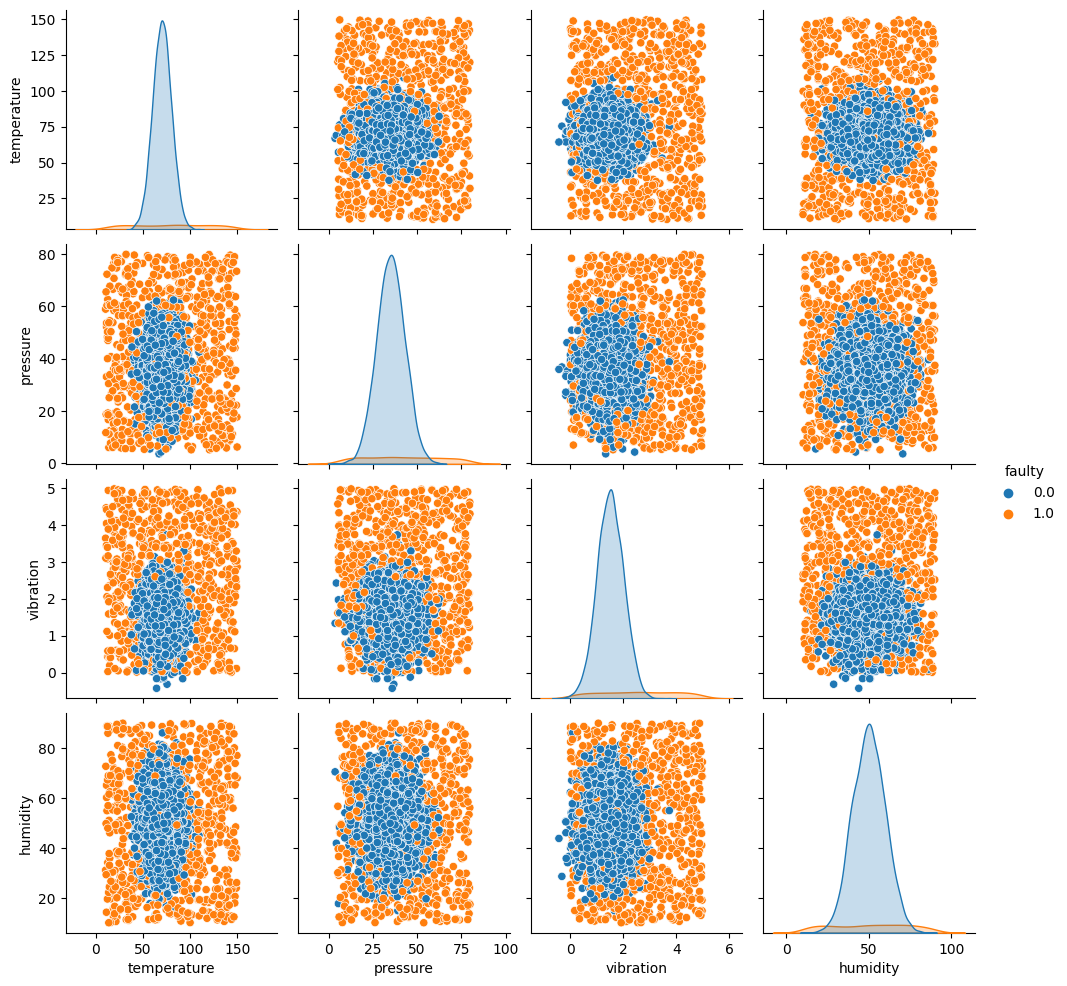

In [5]:
# Pair plot
sns.pairplot(df, hue='faulty')
plt.show()

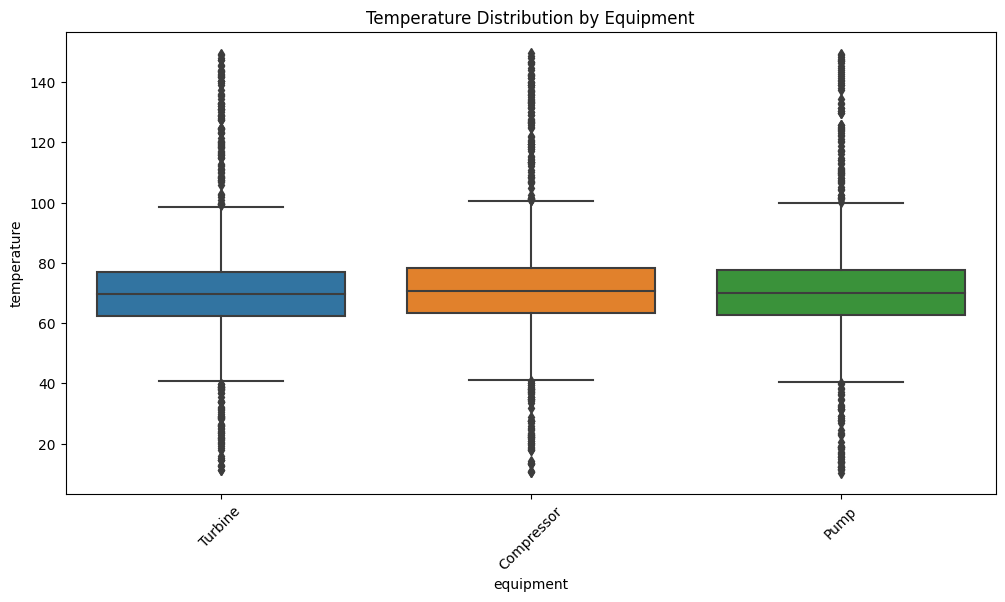

In [6]:
# Box plot for temperature by equipment
plt.figure(figsize=(12, 6))
sns.boxplot(x='equipment', y='temperature', data=df)
plt.title('Temperature Distribution by Equipment')
plt.xticks(rotation=45)
plt.show()

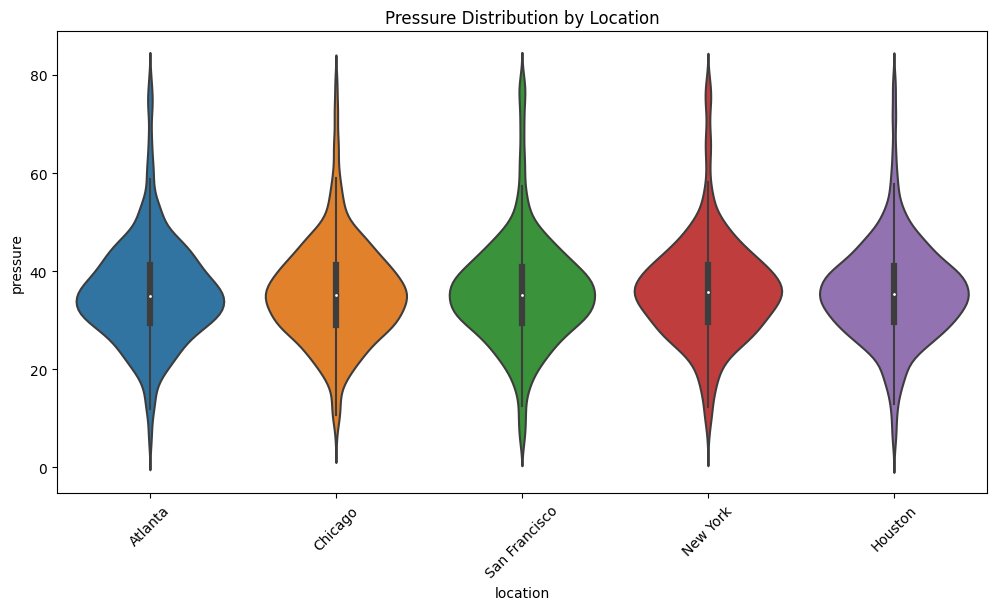

In [7]:
# Violin plot for pressure by location
plt.figure(figsize=(12, 6))
sns.violinplot(x='location', y='pressure', data=df)
plt.title('Pressure Distribution by Location')
plt.xticks(rotation=45)
plt.show()

## Anomaly Detection
<a id='anomaly-detection'></a>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

# Prepare the data
X = numeric_df.drop(columns=['faulty'])
y = numeric_df['faulty']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Predict anomalies
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Convert predictions to binary (1 for normal, -1 for anomaly)
y_pred_train = np.where(y_pred_train == 1, 0, 1)
y_pred_test = np.where(y_pred_test == 1, 0, 1)

# Evaluate the model
print('Training Classification Report:')
print(classification_report(y_train, y_pred_train))

print('Testing Classification Report:')
print(classification_report(y_test, y_pred_test))

Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5528
         1.0       0.88      0.89      0.89       609

    accuracy                           0.98      6137
   macro avg       0.94      0.94      0.94      6137
weighted avg       0.98      0.98      0.98      6137

Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1377
         1.0       0.93      0.91      0.92       158

    accuracy                           0.98      1535
   macro avg       0.96      0.95      0.95      1535
weighted avg       0.98      0.98      0.98      1535



## Conclusion and Future Work
<a id='conclusion'></a>

In this notebook, we explored an industrial equipment monitoring dataset to detect anomalies that could indicate potential equipment faults. We utilized various visualization techniques to understand the data better and employed an Isolation Forest model for anomaly detection. The model's performance can be further improved by tuning hyperparameters or exploring other anomaly detection algorithms.

Future work could involve integrating real-time monitoring systems and developing predictive maintenance schedules based on detected anomalies. If you found this notebook helpful, please consider upvoting it.